In [47]:
%load_ext autoreload
%autoreload 2
import numpy as np

ys = np.array([0.,0.05, 0.1 ,0.2 ,0.3 ,0.5 ,1.,2.,3.,5.,8.,10 ,12 ,15 ,20])
rhos = np.array([1.225,1.219,1.213,1.202,1.190,1.167,1.112,1.007,0.909,0.736,0.526,0.414,0.312,0.195,0.089])
z = np.polyfit(ys, rhos, 4)

z

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


array([ 3.33121912e-06, -1.67661954e-04,  5.15632148e-03, -1.19537867e-01,
        1.22544656e+00])

In [48]:
from ipywidgets import interact, IntSlider, FloatSlider
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')

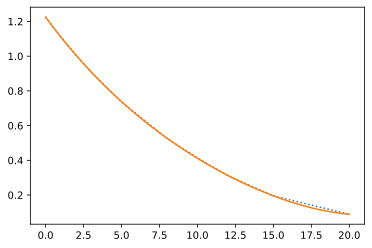

In [49]:

plt.plot(ys, rhos, ':')
xs = np.linspace(ys[0], ys[-1],100)
plt.plot(xs, z[0]*xs**4 + z[1]*xs**3 + z[2]*xs**2 + z[3]*xs + z[4])

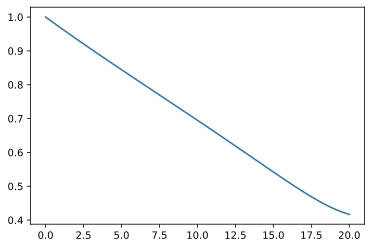

In [50]:
plt.plot(xs, ((z[0]*xs**4 + z[1]*xs**3 + z[2]*xs**2 + z[3]*xs + z[4])/z[4])**(1/3))

In [51]:
from cydrone.drone import Drone2d
from easyvec import Vec2

In [52]:
def get_zz(F1, F2):

    drone = Drone2d.get_DJI()
    drone.mu_omega = 1.0
    d = drone.to_dict()
    d['alpha'] = 0 * 3.14/180
    drone.from_dict(d)
    drone.g = 9.81
    dcts = [d]
    for i in range(300):
        drone.step(F1, F2, 0.01, 10)
        d = drone.to_dict()
        dcts.append(d)
    return dcts

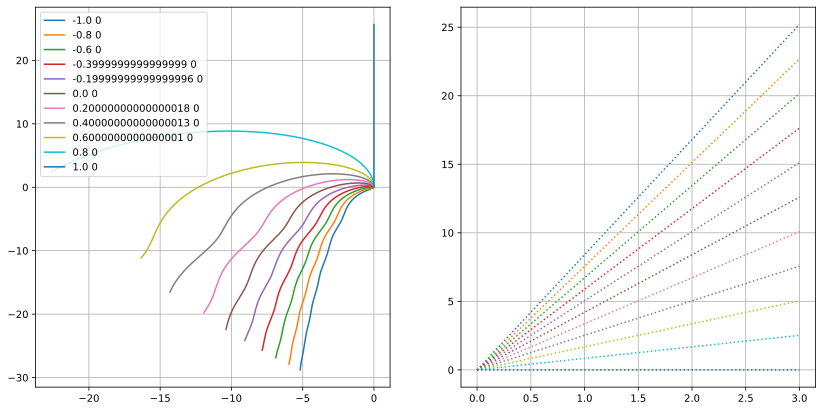

In [53]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,7))
for F1 in np.linspace(-1,1,11):
    dcts = get_zz(F1, 1)
    xs = [d['pos'].x for d in dcts]    
    ys = [d['pos'].y for d in dcts]    
    ax1.plot(xs, ys, label=f'{F1} 0')
    
    ts = [d['t'] for d in dcts]   
    ass = [d['alpha'] for d in dcts]   
    oms = [d['omega'] for d in dcts]   
#     ax2.plot(ts, ass, label=f'alpha {F1}')
    ax2.plot(ts, oms, ls=':', label=f'omegas {F1}')
ax1.legend()
ax1.grid()
ax2.grid()
plt.show()

In [54]:
15/3.14/2

2.3885350318471334

In [55]:
50**2 * 3.14 / 4 * 6000 / 10**9 * 7800

91.845

In [56]:
drone = Drone2d.get_DJI()
d = drone.to_dict()
d['vel'] = Vec2(10,
                -10)
drone.from_dict(d)

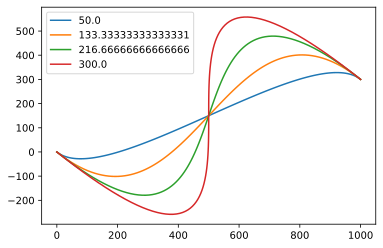

In [57]:
for t in np.linspace(50,300, 4):
    tr = drone.get_traject(t, (1000, 300), (10,-10))
    plt.plot(tr[:,0], tr[:,1], label=f'{t}')
plt.legend()

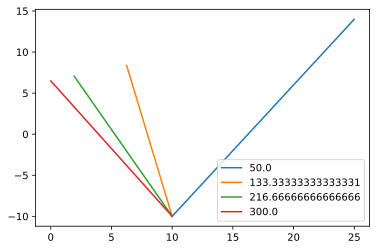

In [58]:
for t in np.linspace(50,300, 4):
    tr = drone.get_traject_vels(t, (1000, 300), (10,-10))
    plt.plot(tr[:,0], tr[:,1], label=f'{t}')
plt.legend()

(0.9762812094883317, 20.0, 0.2803965445975079)


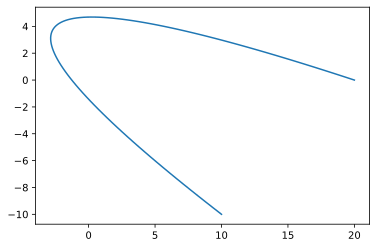

In [59]:
tr = drone.get_traject_vels(300, (1000, 300), (20,0))
print(drone.get_vmin_vmax_amax(300, Vec2(1000, 300), Vec2(20,0)))
plt.plot(tr[:,0], tr[:,1])

In [109]:
def get_acs(drone, delta_t, pos_trg, vel_trg, n_points):
    from cydrone.drone import get_B, get_C
    ts = np.linspace(0,1, n_points)
    A = Vec2(drone.state[0], drone.state[1])
    velA = Vec2(drone.state[2], drone.state[3])
    D = Vec2(pos_trg[0], pos_trg[1])
    B = get_B(delta_t, A, velA)
    C = get_C(delta_t, D, Vec2(vel_trg[0], vel_trg[1]))

    return np.array([
        (-6*(B-A) + 6*blend*(B-A) + 6 * (C-B) - 12*blend*(C-B) + 6 * blend*(D-C))/(delta_t)**2
        for blend in ts
    ])


In [115]:
from matplotlib import cm
import matplotlib as mpl
import matplotlib.pyplot as plt

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

In [155]:
col_map = cm.get_cmap('tab10', 256)
[col_map(t) for t in np.linspace(0.0,1,50)]

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (1.0, 0.4980392156862745, 0.054901960784313725, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0),
 (0.8392156862745098, 0.152941

In [ ]:
plt.scatter()

In [172]:
ts =  [5, 7, 10, 20, 40]#np.linspace(5,40,7)
col_map = cm.get_cmap('tab10', 256)
colors = [col_map(t) for t in np.linspace(0.1,0.7,len(ts))]
colors = [(1.0, 0.4980392156862745, 0.054901960784313725, 1.0),           
          (0.09019607843137255, 0.7450980392156863, 0.8117647058823529, 1.0),
         (0.5490196078431373, 0.33725490196078434, 0.29411764705882354, 1.0),
         (0.5803921568627451, 0.403921568627451, 0.7411764705882353, 1.0),
         (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)]
n_points=1000
@interact(v0x=FloatSlider(min=-10, max=10,step=0.5, value=2.5), 
          v0y=FloatSlider(min=-10, max=10,step=0.5, value=-1.5), 
          v1x=FloatSlider(min=-10, max=10,step=0.5, value=3), 
          v1y=FloatSlider(min=-10, max=10,step=0.5, value=3))
def plot_sever(v0x, v0y, v1x, v1y):
    fig = plt.figure(figsize=(9,5))
    ax1 = plt.subplot(2,3,2)
    ax2 = plt.subplot(2,3,5)
    ax0 = plt.subplot(1,3,1)
    ax3 = plt.subplot(2,3,3)
    ax4 = plt.subplot(2,3,6)
    ax2, ax3 = ax3, ax2
    drone = Drone2d.get_DJI()
    d = drone.to_dict()
    d['vel'] = Vec2(v0x, v0y)
    drone.from_dict(d)
    v1 = (v1x, v1y)
    trg_pos = (20, 30)
    ax0.arrow(drone.pos.x, drone.pos.y, v0x, v0y, width=0.05*5, color='blue', zorder=3)
    ax0.arrow(*trg_pos, v1x, v1y, width=0.05*5, color='green', zorder=3)
    ax0.scatter([drone.pos.x], [drone.pos.y], color='blue', zorder=3, label='$t=0$')
    ax0.scatter([trg_pos[0]], [trg_pos[1]], color='green', zorder=3, label='$t=t_1$',  marker='^')
    
    ax1.scatter([v0x], [v0y], color='blue', zorder=3)
    ax1.scatter([v1x], [v1y], color='green', zorder=3,  marker='^')
#     ax1.arrow(0,0, v0x, v0y, width=0.05*5, color='blue', zorder=3,alpha=0.5)
#     ax1.arrow(0,0, v1x, v1y, width=0.05*5, color='green', zorder=3,alpha=0.5)
    ax2.scatter([0], [(v0y**2+v0x**2)**0.5], color='blue', zorder=3)
    for t,col in zip(ts, colors):
        tr = drone.get_traject(t, trg_pos, v1, n_points=n_points)
        ax0.plot(tr[:,0], tr[:,1], label=f'$t_1$={t} s', color = col, alpha=1)
        vels = drone.get_traject_vels(t, trg_pos, v1, n_points=n_points)
        
        ax1.plot(vels[:,0], vels[:,1], label=f'$t$={t}', color = col, alpha=1)
        
        xs = np.linspace(0, t, vels.shape[0])
        ys= [np.linalg.norm(v) for v in vels]
        ax2.plot(xs, ys, color = col)
        ax2.scatter([xs[-1]], [ys[-1]], color='green', zorder=3, alpha=0.7,  marker='^')
        
        acs = get_acs(drone, t, trg_pos, v1, n_points)
        ax3.plot(acs[:,0], acs[:,1], label=f'$t$={t}', color = col, alpha=1)
        ax3.scatter([acs[0, 0]], [acs[0, 1]],color='blue', zorder=3, alpha=0.7)
        ax3.scatter([acs[-1, 0]], [acs[-1, 1]], color='green', zorder=3, alpha=0.7,  marker='^')
        
        xs = np.linspace(0, t, acs.shape[0])
        ys= [np.linalg.norm(v) for v in acs]
        ax4.plot(xs, ys, color = col)
        ax4.scatter([xs[0]], [ys[0]], color='blue', zorder=3, alpha=0.7)
        ax4.scatter([xs[-1]], [ys[-1]], color='green', zorder=3, alpha=0.7,  marker='^')
        
    ax0.set_aspect('equal')
#     ax1.set_aspect('equal')
    ax0.grid()
    ax1.grid()
    ax2.grid()
    ax3.grid()
    ax4.grid()
    ax0.legend()
    ax0.set_xlabel('$x$, m')
    ax0.set_ylabel('$y$, m')
    
    ax1.set_xlabel('$dx/dt$, m/s')
    ax1.set_ylabel('$dy/dt$, m/s')
    
    ax2.set_xlabel('$t$, s')
    ax2.set_ylabel('$|\mathbf{V}|$, m/s')
    
    ax3.set_xlabel('$d^2x/dt^2$, m/s$^2$')
    ax3.set_ylabel('$d^2y/dt^2$, m/s$^2$')
    
    ax4.set_xlabel('$t$, s')
    ax4.set_ylabel('$|\mathbf{a}|$, m/s')
    ax0.set_title('(a)')
    ax1.set_title('(b)')
    ax2.set_title('(c)')
    ax3.set_title('(d)')
    ax4.set_title('(e)')
    plt.tight_layout()
    
    plt.show()
        


interactive(children=(FloatSlider(value=2.5, description='v0x', max=10.0, min=-10.0, step=0.5), FloatSlider(va…

In [149]:
from scipy.optimize import minimize

In [13]:
def denorm(x, drone, pos_trg, vel_trg_len, a_max):
    delta_t, alpha_trg = x
    vA = drone.vel
    t1 = (pos_trg-drone.pos).len() / (0.5 * (vel_trg_len + vA.len()))
    delta_t = delta_t * t1
    return delta_t, alpha_trg

def minim_foo(x, drone, pos_trg, vel_trg_len, a_max, v_max):
    delta_t, alpha_trg = denorm(x, drone, pos_trg, vel_trg_len, a_max)
    if delta_t < 1e-6:
        return 1e10
    vA = drone.vel
    vel_trg = Vec2(vel_trg_len, 0).rotate(alpha_trg)
    vmin ,vmax, amax = drone.get_vmin_vmax_amax(delta_t, pos_trg, vel_trg)
    shtraf = 1
    vminAD = min(vA.len(), vel_trg_len) * 0.5
    vmaxAD = max(vA.len(), vel_trg_len, v_max) 
    if vmin < vminAD:
        shtraf += 10
    if vmax > vmaxAD:
        shtraf += 10
    if amax > a_max:
        shtraf += 10
    return delta_t * shtraf
    

In [14]:
pos_trg = Vec2(100, 200)
vel_trg_len =1
a_max = 13
v_max = 30
res = minimize(minim_foo, (1,0), args=(drone, pos_trg, vel_trg_len, a_max, v_max),method='Nelder-Mead', options={
    'maxfev': 42,
    'initial_simplex': np.array([[1,0], [1.5, -1], [0.5, 1]])
})
res

 final_simplex: (array([[0.28465176, 1.43069649],
       [0.28475952, 1.43048096],
       [0.28530431, 1.42939138]]), array([11.57273958, 11.57712086, 11.59926958]))
           fun: 11.572739581301597
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 43
           nit: 21
        status: 1
       success: False
             x: array([0.28465176, 1.43069649])

In [15]:
# %%timeit 
# res = minimize(minim_foo, (1,0), args=(drone, pos_trg, vel_trg_len, a_max, v_max),method='Nelder-Mead', options={ 
#     'maxfev': 42,
#     'initial_simplex': np.array([[1,0], [1.5, -1], [0.5, 1]])
# })

In [16]:
delta_t, alpha_trg = denorm(res.x, drone,  pos_trg, vel_trg_len, a_max)

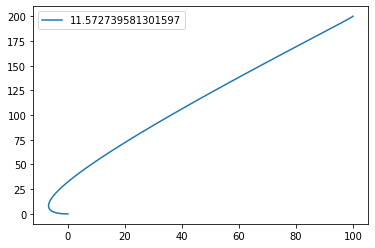

In [17]:
tr = drone.get_traject(delta_t, pos_trg, Vec2(vel_trg_len,0).rotate(alpha_trg))
plt.plot(tr[:,0], tr[:,1], label=f'{delta_t}')
plt.legend()

(0.9999999999999989, 29.98528263071749, 11.825764343837765)


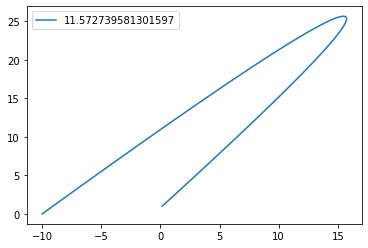

In [18]:
tr = drone.get_traject_vels(delta_t, pos_trg, Vec2(vel_trg_len,0).rotate(alpha_trg))
plt.plot(tr[:,0], tr[:,1], label=f'{delta_t}')
print(drone.get_vmin_vmax_amax(delta_t, pos_trg, Vec2(vel_trg_len,0).rotate(alpha_trg)))
plt.legend()

In [19]:
from easyvec import Mat2

In [24]:
from drone_gym import DroneGym

In [25]:
gym = DroneGym.make('ha')

In [94]:
import numpy as np
observation_ = gym.reset()
gym.antiflip = True
done = False

In [95]:

gym.record_history = True
i = 0
while not done and i < 2000:
#     observation_, reward, done, info = gym.step(np.random.uniform(0.99,1, size=2))
    observation_, reward, done, info = gym.step(agent.choose_action(observation_))
    i += 1
info

{'result': 'success',
 'final_reward': -230.7800504947365,
 'pos_diff': 0.8799255823039192,
 'dir_diff': 1.7313637383474187,
 'vel_diff': 2.136473975447987}

In [96]:
from ipywidgets import interact, interactive, fixed
import ipywidgets

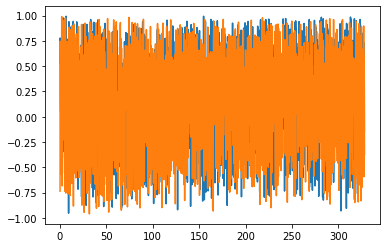

In [97]:
xs = []
ys = []
f1s = []
f2s = []
rewards = []
ts = []
dts = []
scores = [0]
for d in gym.history:
    gym.set_state(d['state'])
    xs.append(gym.drone.pos.x)
    ys.append(gym.drone.pos.y)
    f1, f2 = d['actions']
    f1s.append(f1)
    f2s.append(f2)
    ts.append(gym.time_curr)
    rewards.append(d['reward'])
    dts.append(d['delta_t1'])
    scores.append(scores[-1]+d['reward'])
scores = scores[1:]
i1=0
i2=-1
# plt.plot(ts[i1:i2], rewards[i1:i2])
plt.plot(ts[i1:i2], f1s[i1:i2])
plt.plot(ts[i1:i2], f2s[i1:i2])
# plt.plot(ts[i1:i2], dts[i1:i2])

In [98]:
@interact(i=ipywidgets.IntSlider(min=0,max=len(gym.history)-1,step=1, value=0))
def plot_history(i):
    d = gym.history[i]
    i1=max(0,i-30)
    i2=i+1
    gym.set_state(d['state'])
    fig, (ax, ax2, ax3) = plt.subplots(1,3, figsize=(14,7))
    gym.plot(ax, drone_mashtb=20, vec_mashtb=1, actions=d['actions'],ideal_traj=True)
    ax.plot(xs[i1:i],ys[i1:i],ls=':')
    ax.set_aspect('equal', adjustable='box')
    
    
#     ax2.plot(ts[i1:i2], f1s[i1:i2])
#     ax2.plot(ts[i1:i2], f2s[i1:i2])
    ax2.grid()
    ax2.plot(ts[i1:i2], scores[i1:i2])
    
    ax3.plot(ts[i1:i2], rewards[i1:i2])
    ax3.grid()
    ax.grid()
    plt.show()

interactive(children=(IntSlider(value=0, description='i', max=1640), Output()), _dom_classes=('widget-interact…

In [33]:
import torch as T

In [119]:
env.action_space.shape[0]

2

In [35]:
import numpy as np

# Обучение

In [36]:
from drone_sac import Agent
from drone_gym import DroneGym
from tqdm.notebook import tqdm

In [114]:
env = DroneGym.make('ww')

In [115]:
agent = Agent(action_space_high = env.action_space.high, input_dims=env.obs_max.shape)

TypeError: super(type, obj): obj must be an instance or subtype of type

In [116]:
score = 0
env.record_history = False
env.antiflip = True
for i in tqdm(range(250)):
    observation = env.reset()
    done = False
    score = 0
    while not done:
#         action = np.random.uniform(0.97,1, size=2)
        action = agent.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        score += reward
        agent.remember(observation, action, reward, observation_, done)
#         if not load_checkpoint:
        agent.learn()
        observation = observation_

#     print(info)

  0%|          | 0/250 [00:00<?, ?it/s]

tensor([[nan, nan]], device='cuda:0', grad_fn=<AddmmBackward>) tensor([[nan, nan]], device='cuda:0', grad_fn=<ClampBackward>)


ValueError: The parameter loc has invalid values

In [67]:
for i in tqdm(range(1000)):
    agent.learn()

  0%|          | 0/1000 [00:00<?, ?it/s]

In [65]:
agent.batch_size = 1024 * 16

In [64]:
agent.memory.mem_cntr

561228

In [2]:
from easyvec import Vec2

In [263]:
A = Vec2(0,0)
Va = Vec2(5,5)

D = Vec2(11,10)
Vd_len = 1

In [264]:
ts = np.linspace(1,10)
Vd_facts = []
for t in ts:
    Z = A + t*Va/2
    
    Vd_facts.append((Z-D).len()*2 /t)

In [64]:
import torch as T

In [ ]:
T.save()

In [259]:
Va.len()

11.180339887498949

In [3]:
Vec2(1,0).angle_to(Vec2(0,1), degrees=True)

90.0